# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
data = pd.read_csv("train.csv")
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S


Обратим внимание на долю пропущенных значений в колонке "Age":

In [4]:
data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Заменим пропущенные значения в этой колонке на среднее значение по ней:

In [5]:
mean = data['Age'].mean()
mean = float(mean)
data['Age'] = data['Age'].fillna(mean)
data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [6]:
train = data.sample(frac=0.7, axis=0, random_state=42).reset_index()
del train['index']
test = pd.concat([data, train]).drop_duplicates(keep=False)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [7]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

Заодно создадим таблицу train, полученную конкатенацией X и Y (обучающий датасет):

In [8]:
X, Y = get_features_and_target(train)
valid, target = get_features_and_target(test)

train = pd.concat([X, Y], axis=1)
train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
252,3,male,29.699118,0,0,7.7500,0
350,1,female,44.000000,0,1,57.9792,1
246,3,male,29.699118,0,0,8.0500,0
103,3,male,38.000000,0,0,7.0500,0
539,3,male,24.000000,0,0,7.1417,1


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных, чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

Поскольку я заменил пропуски в колонке "Age" на среднее значение, то не будем сильно обращать внимание на высоту средней колонки на гистограммах, принимая всё же во внимание количество погибших этой категории.
Начнём с неочевидного пункта --- количества выживших и погибших в зависимости от наличия братьев и сестёр на корабле

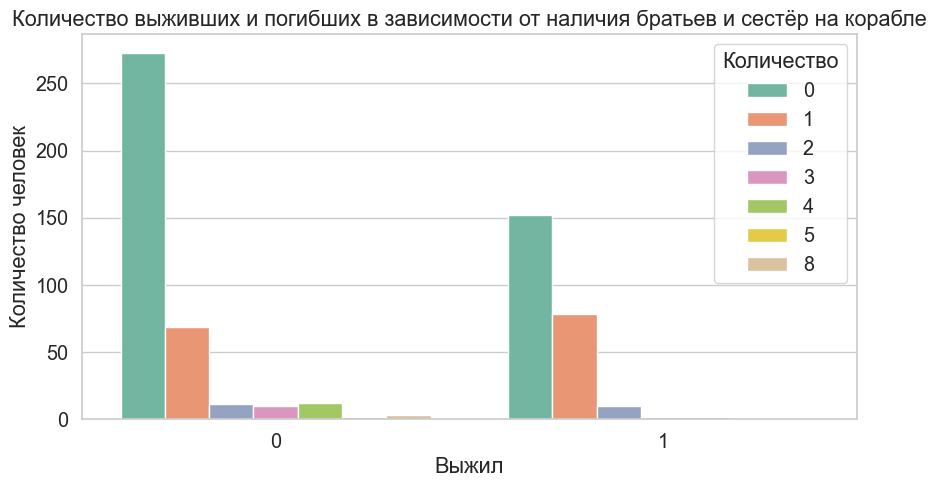

In [9]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data = train,
    x='Survived',
    hue='SibSp'
)

plt.title('Количество выживших и погибших в зависимости от наличия братьев и сестёр на корабле')
plt.xlabel('Выжил')
plt.ylabel('Количество человек')
plt.legend(title='Количество')

plt.show()

Сократим масштаб по вертикали

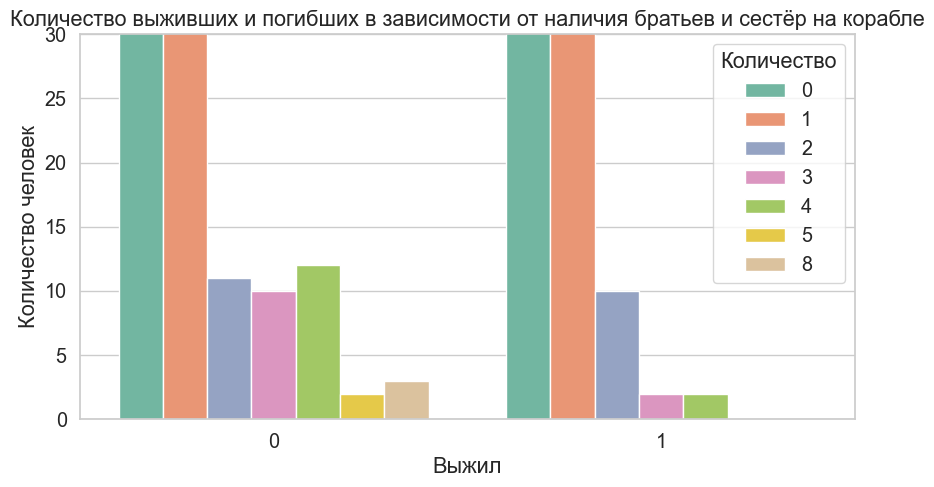

In [10]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data = train,
    x='Survived',
    hue='SibSp'
)

plt.title('Количество выживших и погибших в зависимости от наличия братьев и сестёр на корабле')
plt.xlabel('Выжил')
plt.ylabel('Количество человек')
plt.ylim((0, 30))
plt.legend(title='Количество')

plt.show()

Видно, что везение было явно не на стороне тех, у кого было больше 3 братьев и сестёр

Теперь посмотрим на распределение стоимости билетов в зависимости от класса пассажира

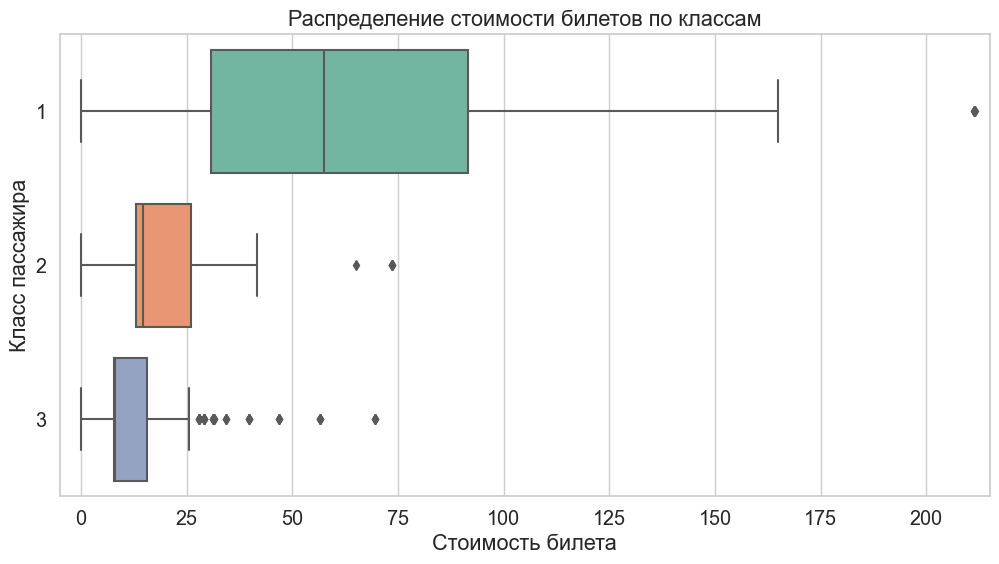

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=train, x='Fare', y='Pclass', orient='h')

plt.xlim((-5, 215))
plt.xlabel("Стоимость билета")
plt.ylabel("Класс пассажира")
plt.title("Распределение стоимости билетов по классам")

plt.show()

Видно, что чем выше класс (первый самый высокий), тем дороже билет. Важно понимать, как много людей выжили в каждом классе. Для этого построим соответствующую countplot, где выжил человек или нет обозначается цифрой 1 и 0 соответственно:

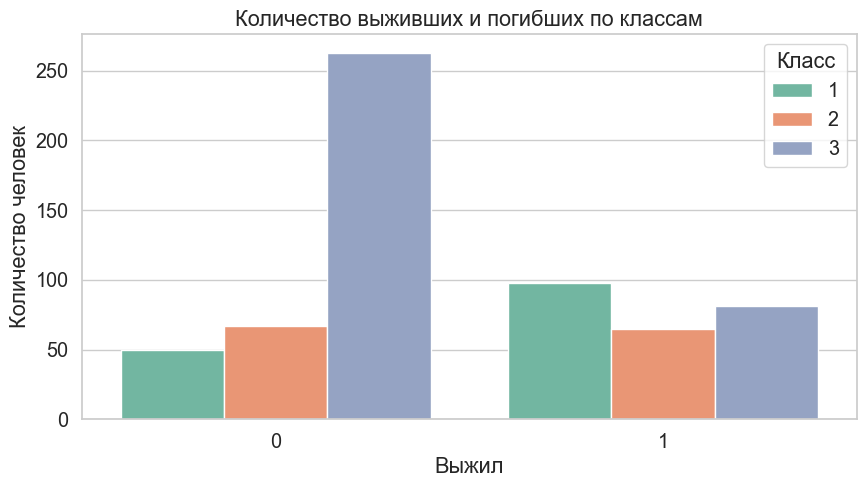

In [12]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data = train,
    x='Survived',
    hue='Pclass'
)

plt.title('Количество выживших и погибших по классам')
plt.xlabel('Выжил')
plt.ylabel('Количество человек')
plt.legend(title='Класс')

plt.show()

Отчетливо видно, что существует сильная разница в количестве выживших и погибших людей третьего класса. Посмотрим на количество выживших относительно общего числа пассажиров для каждого класса по возрасту, используя гистограмму:

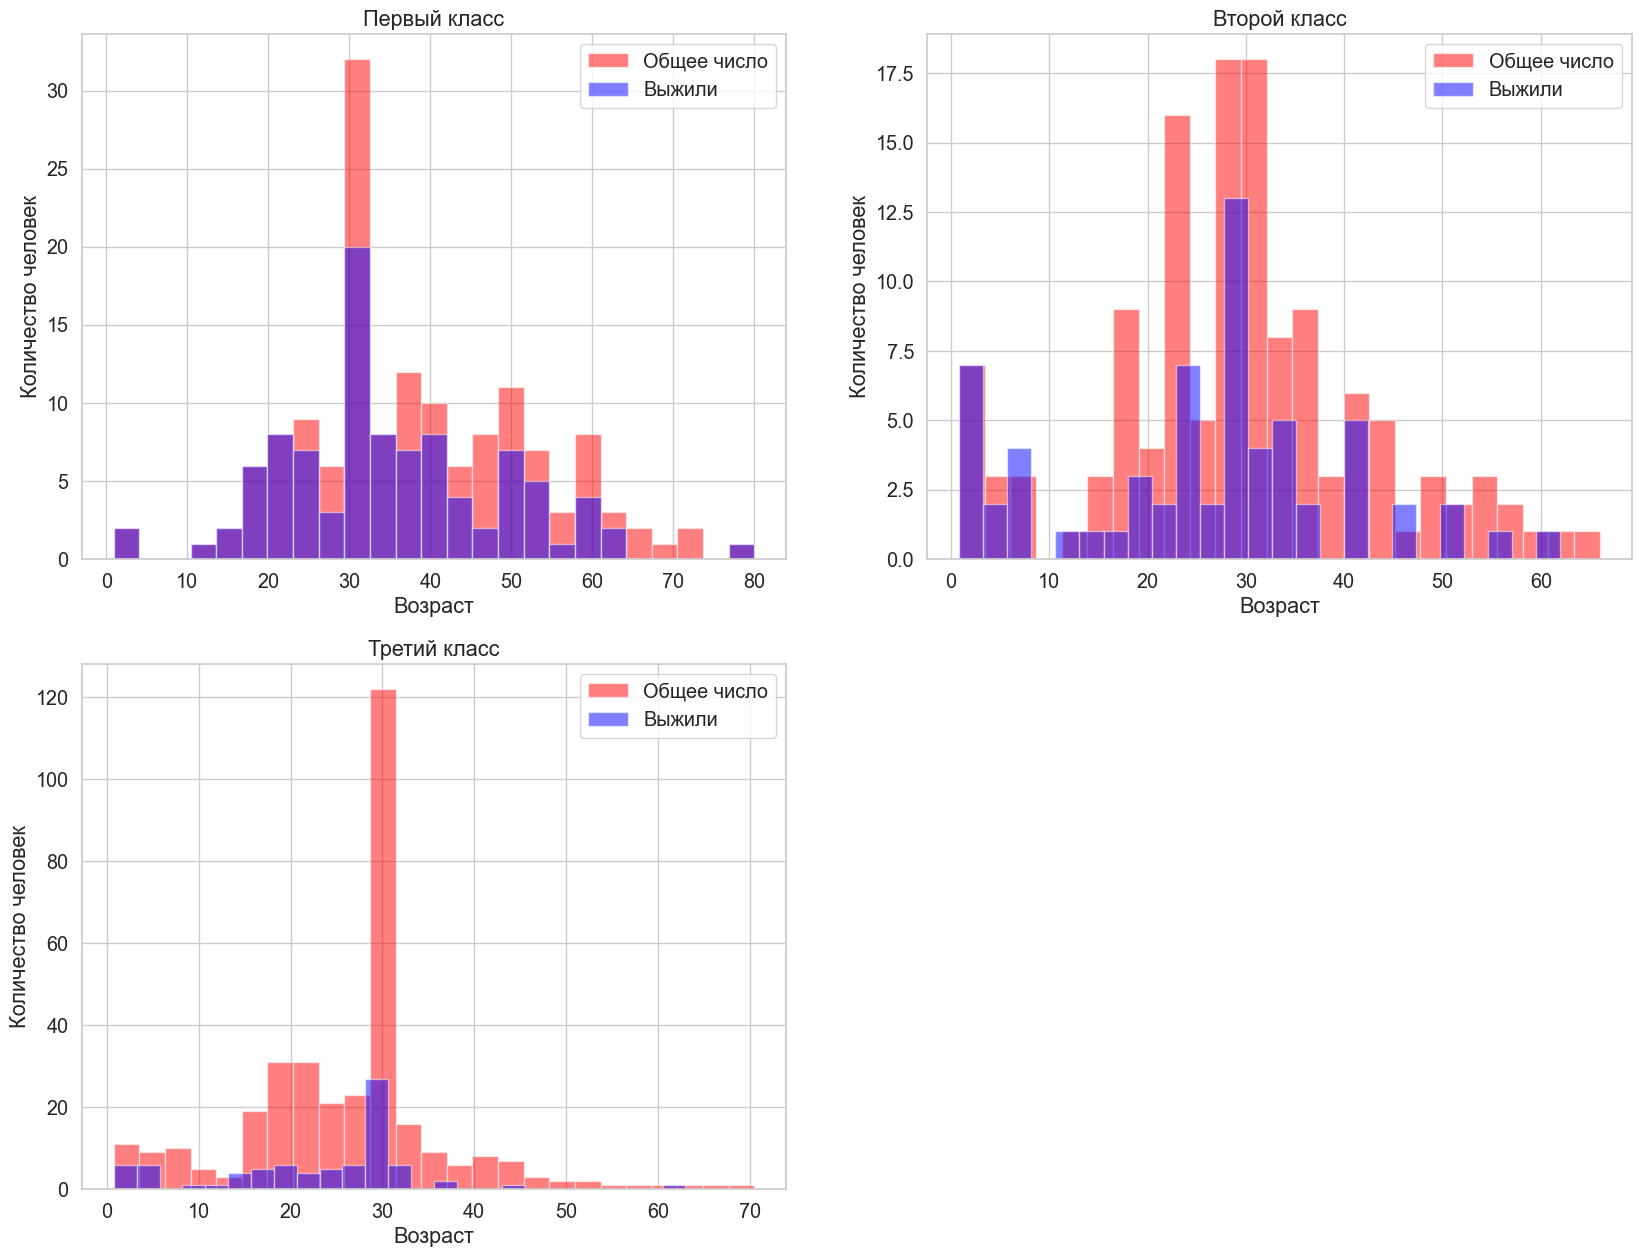

In [13]:
first = train[train.Pclass == 1]
second = train[train.Pclass == 2]
third = train[train.Pclass == 3]

first_surv = first[first.Survived == 1]
second_surv = second[second.Survived == 1]
third_surv = third[third.Survived == 1]

plt.figure(figsize=(20,15))

f = plt.subplot(221)
plt.hist(first['Age'], bins=25, alpha=0.5, color='r', label='Общее число')
plt.hist(first_surv['Age'], bins=25, alpha=0.5, color='b', label='Выжили')
plt.title('Первый класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

f = plt.subplot(222)
plt.hist(second['Age'], bins=25, alpha=0.5, color='r', label='Общее число')
plt.hist(second_surv['Age'], bins=25, alpha=0.5, color='b', label='Выжили')
plt.title('Второй класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

f = plt.subplot(223)
plt.hist(third['Age'], bins=25, alpha=0.5, color='r', label='Общее число')
plt.hist(third_surv['Age'], bins=25, alpha=0.5, color='b', label='Выжили')
plt.title('Третий класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

Видно, что в третьем классе почти никто не выжил, чего не скажешь о первом, в котором доля выживших превышает долю погибших почти в два раза. Во втором классе немного хуже: где-то 50 процентов выживших. При этом, видно, что детей < 10 лет старались спасти во всех классах.

Рассмотрим распределение выживших по полу, используя countplot:

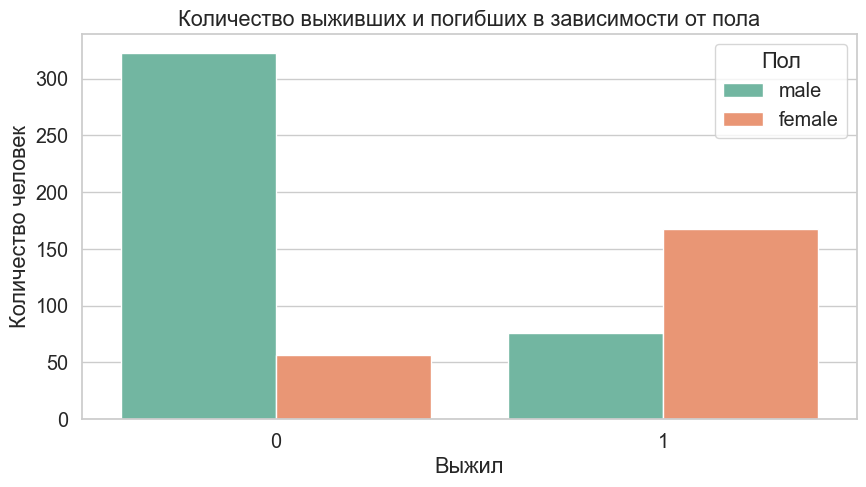

In [14]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data = train,
    x='Survived',
    hue='Sex'
)

plt.title('Количество выживших и погибших в зависимости от пола')
plt.xlabel('Выжил')
plt.ylabel('Количество человек')
plt.legend(title='Пол')

plt.show()

Вывод: женщин спаслось больше, чем мужчин
Посмотрим на распределение по возрастным группам:

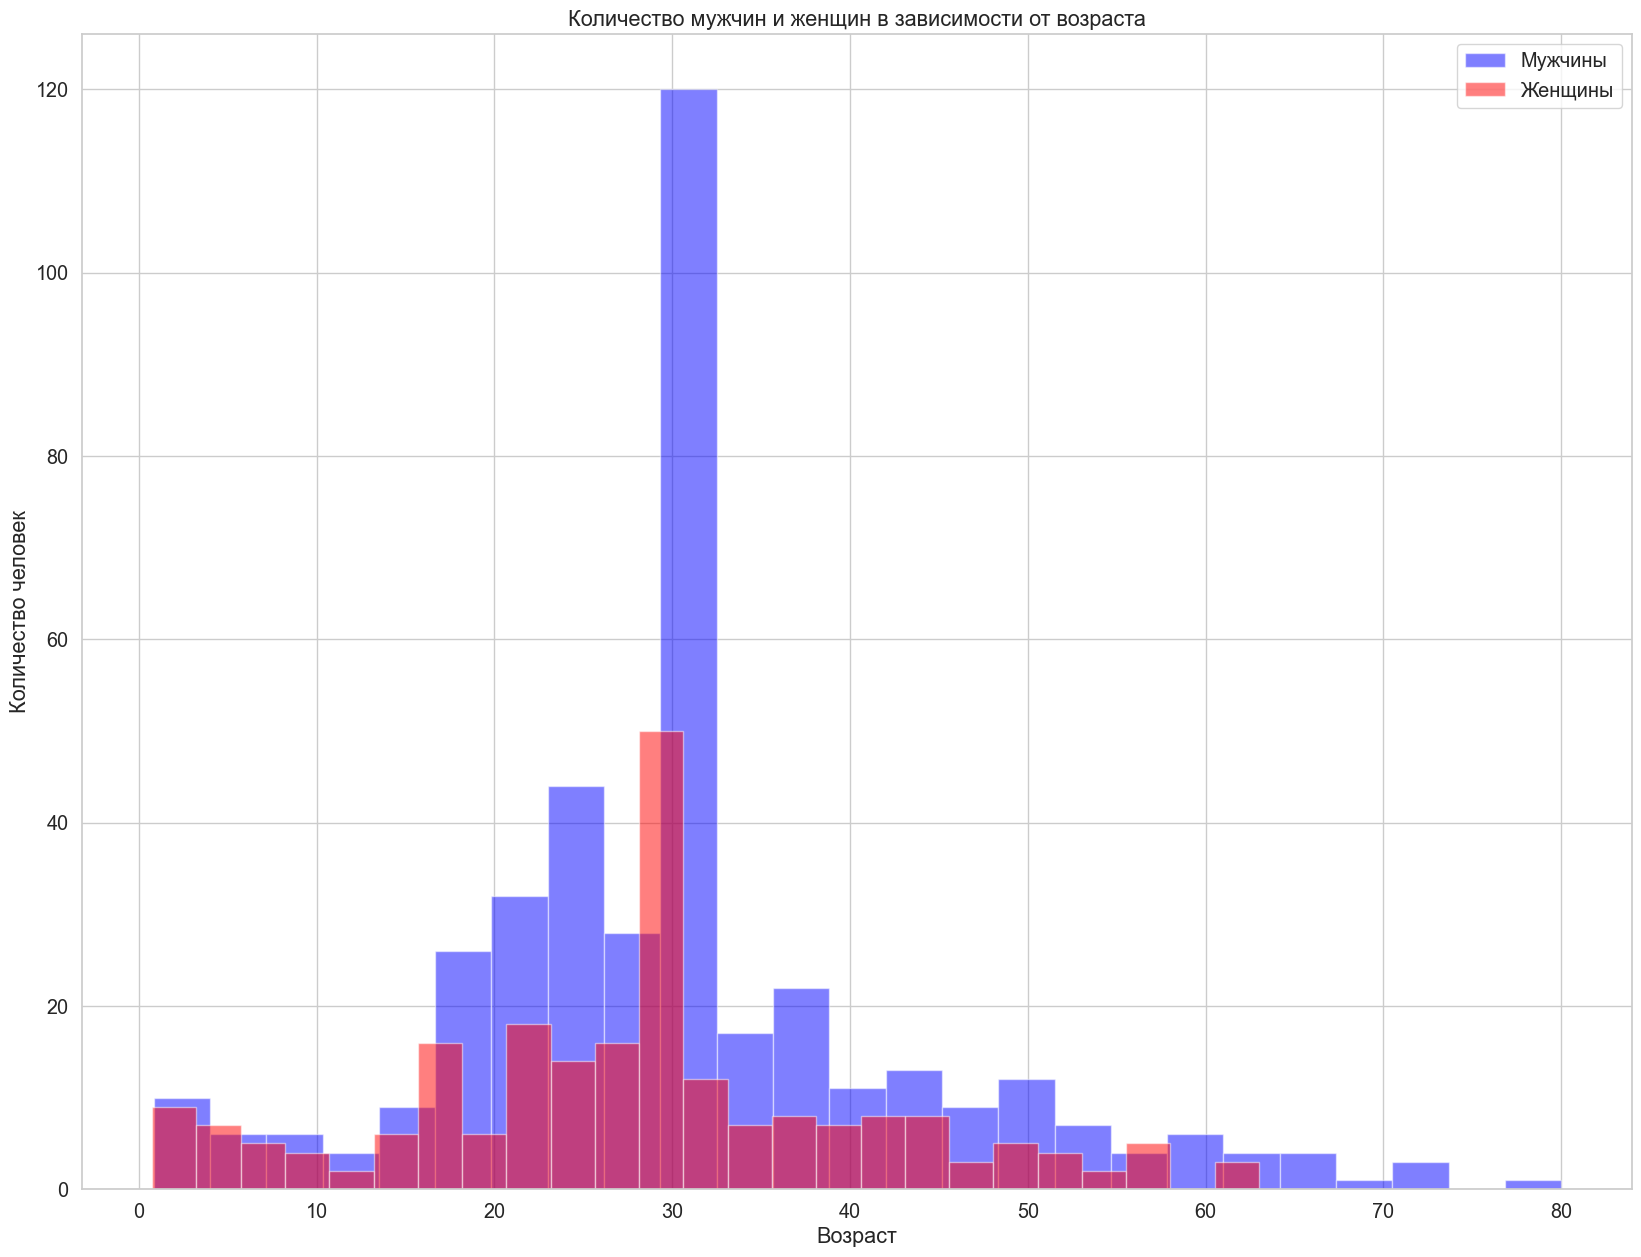

In [15]:
plt.show()
plt.figure(figsize=(20, 15))

male = train[train['Sex'] == 'male']
female = train[train['Sex'] == 'female']

plt.hist(male['Age'], bins=25, alpha=0.5, color='b', label='Мужчины')
plt.hist(female['Age'], bins=25, alpha=0.5, color='r', label='Женщины')

plt.title('Количество мужчин и женщин в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

Женщин буквально в каждой возрастной группе меньше, чем мужчин, при этом спаслось их почти в два раза больше. Также изучим половой вопрос по классам:

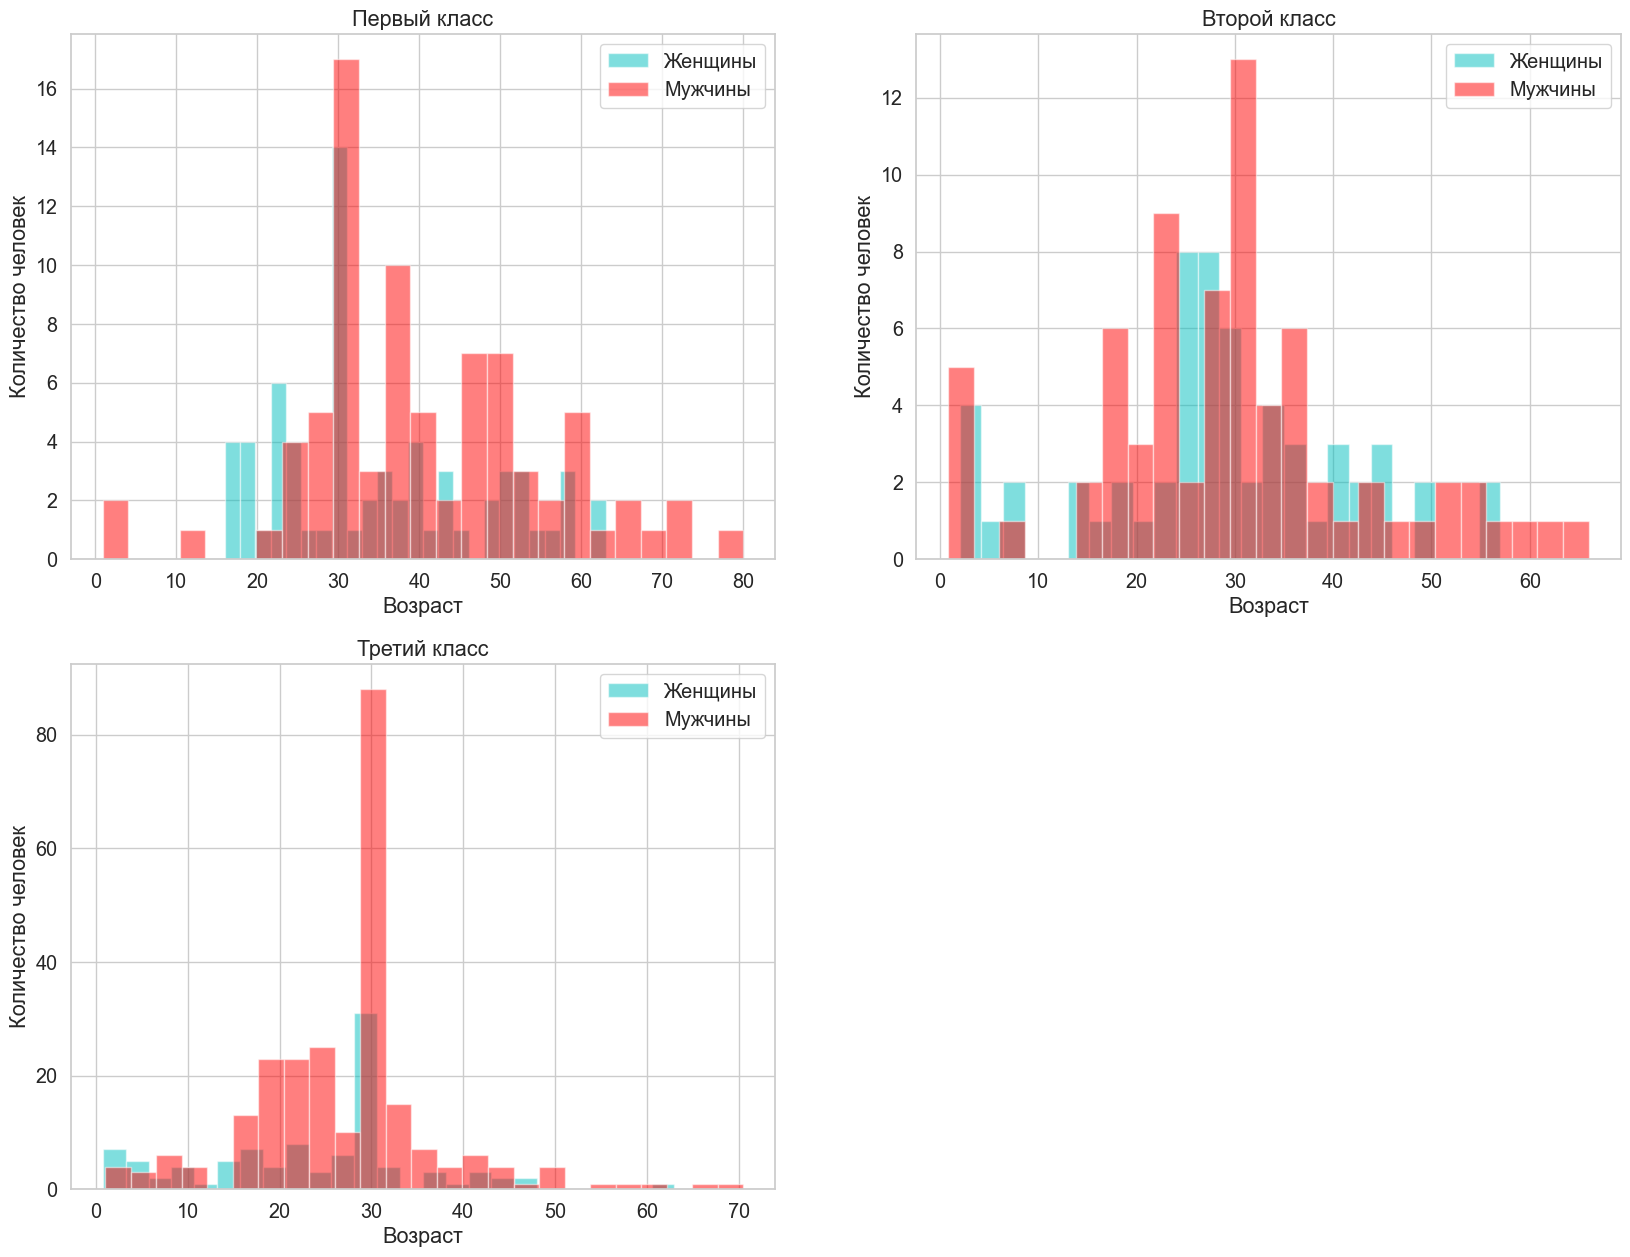

In [16]:
first_fem = first[first.Sex == 'female']
second_fem = second[second.Sex == 'female']
third_fem = third[third.Sex == 'female']

first_ma = first[first.Sex == 'male']
second_ma = second[second.Sex == 'male']
third_ma = third[third.Sex == 'male']

plt.figure(figsize=(20,15))

f = plt.subplot(221)
plt.hist(first_fem['Age'], bins=25, alpha=0.5, color='c', label='Женщины')
plt.hist(first_ma['Age'], bins=25, alpha=0.5, color='r', label='Мужчины')
plt.title('Первый класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

f = plt.subplot(222)
plt.hist(second_fem['Age'], bins=25, alpha=0.5, color='c', label='Женщины')
plt.hist(second_ma['Age'], bins=25, alpha=0.5, color='r', label='Мужчины')
plt.title('Второй класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

f = plt.subplot(223)
plt.hist(third_fem['Age'], bins=25, alpha=0.5, color='c', label='Женщины')
plt.hist(third_ma['Age'], bins=25, alpha=0.5, color='r', label='Мужчины')
plt.title('Третий класс')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

В каждом классе женщин сильно меньше, чем мужщин. В купе с предыдущими выводами признак женского пола должен сильно влиять на спасение.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**
                                SibSp
                   ([3,8])------      ------([0,2])
                    No                           Pclass
                                          (3)------     ------(1,2)
                                          Age                       Pclass
                               (<7)------   ---           (2)------       ------(1)
                               Yes           No           Age                   Yes
                                                   (<10)----- -----
                                                   Yes           No
**Дерево 2:**
                                Pclass
                        (3)------     ----------------------(1,2)
                        Age                                 Pclass
              (<7)------   ---(>=7)          (2)------         ---------------------(1)
              Yes           Sex                        Sex                             Yes
                 (female)---   ---(male)     (male)-----   ----(female)
                  Yes                 No      No                         Yes

Реализуйте полученные деревья по шаблону

В каждой функции на каждом шаге я делю имеющуюся таблицу на новые части в зависимости от требуемого условия.

In [17]:
def tree1(features):
    step11 = features[(features['SibSp'] >=3) & (features['SibSp'] <= 8)]
    step12 = features[features['SibSp'] < 3]
    step11.loc[:, 'Survived'] = 0

    step21 = step12[step12.Pclass == 1]
    step21.loc[:, 'Survived'] = 1

    step22 = step12[step12.Pclass == 2]
    step221 = step22[step22.Age < 10]
    step222 = step22[step22.Age >= 10]
    step221.loc[:, 'Survived'] = 1
    step222.loc[:, 'Survived'] = 0

    step23 = step12[step12.Pclass == 3]
    step231 = step23[step23.Age < 7]
    step232 = step23[step23.Age >= 7]
    step231.loc[:, 'Survived'] = 1;
    step232.loc[:, 'Survived'] = 0;

    predicted = pd.concat([step11, step21, step221, step222, step231, step232]).Survived
    predicted = predicted.sort_index()

    return predicted

In [18]:
def tree2(features):
    step1 = features[features.Pclass == 1]
    step2 = features[features.Pclass == 2]
    step3 = features[features.Pclass == 3]

    step1.loc[:, 'Survived'] = 1

    step21 = step2[step2.Sex == 'male']
    step22 = step2[step2.Sex == 'female']
    step21.loc[:, 'Survived'] = 0
    step22.loc[:, 'Survived'] = 1

    step31 = step3[step3.Age < 7]
    step32 = step3[step3.Age >= 7]
    step31.loc[:, 'Survived'] = 1

    step321 = step32[step32.Sex == 'male']
    step322 = step32[step32.Sex == 'female']
    step321.loc[:, 'Survived'] = 0
    step322.loc[:, 'Survived'] = 1

    predicted = pd.concat([step1, step21, step22, step31, step321, step322]).Survived
    predicted = predicted.sort_index()

    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Отношение количества совпадений ответов к общему числу вариантов.

Реализуйте данный критерий по шаблону

Ничего интересного: берем индексы, делим

In [19]:
def criteria(target, predicted):
    target = pd.DataFrame(target)
    predicted = pd.DataFrame(predicted)

    matches = predicted[predicted.Survived == target.Survived]

    count = matches.index.shape[0]
    common = target.index.shape[0]

    return float(count / common)

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [20]:
predicted = tree1(valid)
criteria(target, predicted)

0.6928838951310862

In [21]:
predicted = tree2(valid)
criteria(target, predicted)

0.7340823970037453

Исходя из результата можно сделать вывод, что половой признак довольно сильно играет роль в выживаемости человека.

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Объявляем функцию нахождения k ближайших соседей:

In [22]:
def find_nearest_points(a: np.ndarray, b: np.ndarray, k: int) -> np.ndarray:
    count_a = a.sum(axis=1).size
    count_b = b.sum(axis=1).size

    diff = (np.expand_dims(b.T, axis=0) - np.expand_dims(a, axis=-1)).T
    mul = (diff * diff).sum(axis=1)

    return (np.argsort(mul, axis=1) + np.ones((count_b, count_a)))[0:count_b, 0:k].astype('int32')

Кодируем значение "female" и "male" в столбце "Sex" соответственно 10 и 100:

In [23]:
valid['Sex'] = valid['Sex'].map({'female': 10, 'male': 100})
X['Sex'] = X['Sex'].map({'female': 10, 'male': 100})
valid.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
550,1,100,17.000000,0,2,110.8833
565,3,100,24.000000,2,0,24.1500
295,1,100,29.699118,0,0,27.7208
112,3,100,22.000000,0,0,8.0500
379,3,100,19.000000,0,0,7.7750


In [24]:
def knn(features, train_features, train_target, k=1):
    # Преобразовываем в np.ndarray и ищем соседей
    feat = features.to_numpy().astype('float64')
    train = train_features.to_numpy().astype('float64')
    neighbors = pd.DataFrame(find_nearest_points(train, feat, k))

    # Меняем в каждом столбце значения индексов на значение в столбце 'Survived'
    for i in range(k):
        neighbors[i] = neighbors[i].apply(lambda x: train_target[x - 1])

    rows = neighbors.shape[0]
    neighbors = neighbors.T

    predicted = np.ndarray(shape=(1, rows))

    # Записываю в каждую ячейку наиболее встречающееся значение в столбце
    for i in range(rows):
        predicted[0][i] = neighbors[i].value_counts().idxmax()

    predicted = pd.DataFrame(predicted.T)
    predicted = predicted.rename(columns={0: 'Survived'})

    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [25]:
results = np.ndarray(shape=(1, 10))

for i in range(10):
    predicted = knn(valid, X, Y, i + 1)
    results[0][i] = criteria(target.reset_index().drop('index', axis=1), predicted)
results = results.reshape((10))

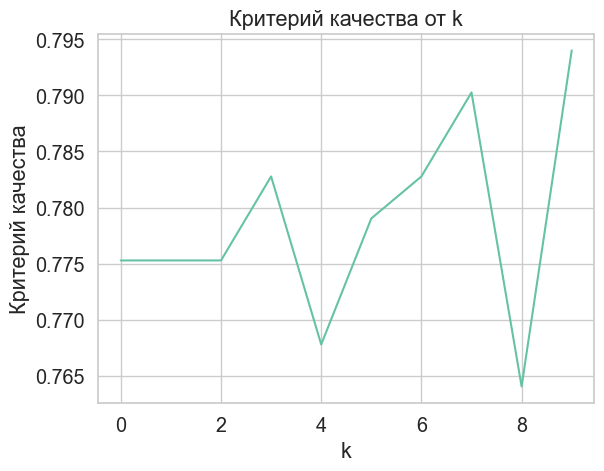

In [26]:
plt.plot(results)

plt.title('Критерий качества от k')
plt.xlabel('k')
plt.ylabel('Критерий качества')

plt.show()

Предлагаю посмотреть на качество при k > 10:

In [27]:
results = np.ndarray(shape=(1, 100))

for i in range(100):
    predicted = knn(valid, X, Y, i + 1)
    results[0][i] = criteria(target.reset_index().drop('index', axis=1), predicted)
results = results.reshape((100))

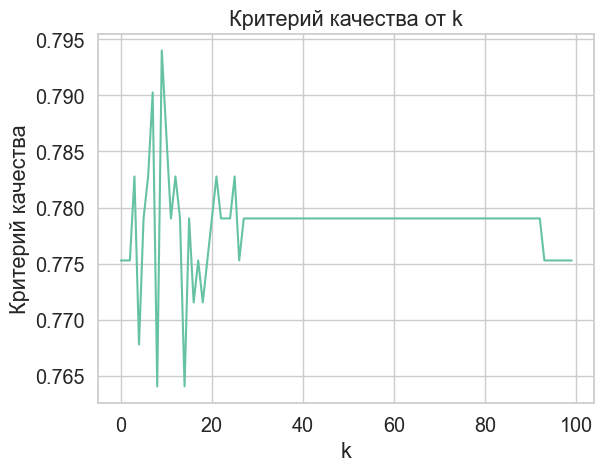

In [28]:
plt.plot(results)

plt.title('Критерий качества от k')
plt.xlabel('k')
plt.ylabel('Критерий качества')

plt.show()

Метод оправдал ожидания: критерий качества достаточно высок. Это не удивительно, поскольку, как я проверил, важным фактором является принадлежность к полу и возраст. Видно, что график качества сильно колеблется при низких значениях k, но при k > 30 качество либо остаётся постоянным, либо вообще уменьшается. Самое лучшее качество равно около 80% верных предсказаний.

#### 6. Выводы

Были исследованы и визуализированы данные пассажиров известного корабля Титаник, а также выдвинуты и проверены гипотезы о том, по какому правилу выживал человек после крушения. А именно: женщины и дети имели преимущество при эвакуации.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

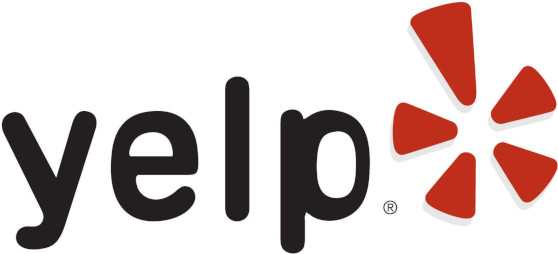

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [29]:
...

Ellipsis

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [30]:
...

Ellipsis

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [31]:
...

Ellipsis

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

In [32]:
...

Ellipsis

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [33]:
...

Ellipsis

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [34]:
...

Ellipsis

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [35]:
...

Ellipsis

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [36]:
...

Ellipsis

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [37]:
...

Ellipsis

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [38]:
...

Ellipsis

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [39]:
...

Ellipsis

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [40]:
...

Ellipsis

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [41]:
...

Ellipsis

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [42]:
...

Ellipsis

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [43]:
...

Ellipsis

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [44]:
...

Ellipsis

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [45]:
...

Ellipsis

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>